In [13]:
import numpy as np
import sympy as sp
from sympy.interactive.printing import init_printing
from IPython.display import display, Math

In [14]:
init_printing(use_unicode=False, wrap_line=False)

# Wedderburn 

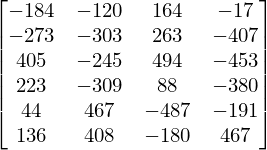

In [17]:
C = np.random.randint(size = (6,4), high = 500, low = -500)
sp.Matrix(C)

In [18]:
def wedd(A, sv = False):
    B = A
    r = np.linalg.matrix_rank(A)
    (m,n) = A.shape
    i1 = np.identity(max(m,n))[np.ix_(list(range(m)),list(range(n)))]
    i2 = i1.T
    k = 0
    ans = []
    ans.append(B)
    ind = np.nonzero(B)
    non = (ind[0][0],ind[1][0])
    s = []
    w = []
    ei = []
    ej = []
    while(abs(B[non]) > 1e-5):
        ei.append(i2[:,[non[1]]])
        ej.append(i1[:,[non[0]]])
        w.append(float(np.matmul(ej[k].T,np.matmul(B,ei[k]))))
        eij = np.matmul(ei[k],ej[k].T)
        s.append((np.matmul(B,np.matmul(eij,B))/w[k]))
        B = B - s[k]
        B[abs(B)<1e-8] = 0
        ans.append(B)
        ind = np.nonzero(B)
        try:
            non = (ind[0][0],ind[1][0])
        except IndexError:
            non = (0,0)
        k += 1
    return(ans,s)

In [19]:
a = wedd(C)

### The Wedderburn Matrices

In [20]:
for i in range(len(a[0])):
    t = sp.latex(sp.Matrix(a[0][i]))
    r = r'{}'.format(t)
    display(Math(r))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
np.linalg.matrix_rank(a[0][0])

4

### Matrix A as a sum of rank one Matrices

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

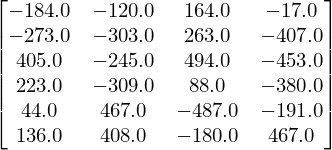

In [22]:
for i in range(len(a[1])):
    t = sp.latex(sp.Matrix(a[1][i]))
    r = r'{}'.format(t)
    display(Math(r))
(m,n) = a[1][0].shape
p = np.zeros((m,n))
for i in range(len(a[1])):
    p = p + a[1][i]
sp.Matrix(p)

In [23]:
np.linalg.matrix_rank(a[1][3])

1

# Biconjugation

In [72]:
def prin(A):
    (m,n) = A.shape
    l = []
    flag = 0
    for i in range(min(m,n)):
        l.append(i)
        if np.linalg.det(A[np.ix_(l,l)]) == 0:
            return(0)
    return(1)

In [73]:
def bic(A, s, x1 = np.matrix([]), y1 = np.matrix([])):
    m = A.shape[0]
    n = A.shape[1]
    r = np.linalg.matrix_rank(A)
    u = []
    v = []
    w = []
    if s == 'trapldu':
        X = np.identity(n)[np.ix_(list(range(n)),list(range(r)))]
        Y = np.identity(m)[np.ix_(list(range(m)),list(range(r)))]
    elif s == 'qr':
        X = np.identity(n)
        Y = A
    elif s == 'cholesky':
        X = np.identity(m)
        Y = np.identity(m)
    elif s == 'sv':
        X = x1
        Y = y1
    else:
        print('Invalid Choice')
        return()
    u.append(X[:,[0]])
    v.append(Y[:,[0]])
    for k in range(1,r):
        sum1 = np.zeros((n,1))
        sum2 = np.zeros((m,1))
        for j in range(k):
            sum1 = sum1 + ((float(np.matmul(np.matmul(v[j].T,A),X[:,[k]]))/float(np.matmul(np.matmul(v[j].T,A),u[j])))*u[j])
            sum2 = sum2 + ((float(np.matmul(np.matmul(Y[:,[k]].T,A),u[j]))/float(np.matmul(np.matmul(v[j].T,A),u[j])))*v[j])
        u.append(X[:,[k]] - sum1)
        v.append(Y[:,[k]] - sum2)
    for k in range(r):
        w.append(float(np.matmul(np.matmul(v[k].T,A),u[k])))
    U = np.concatenate(u, axis = 1)
    V = np.concatenate(v, axis = 1)
    W = np.diag(w)
    if s == 'cholesky':
        W1 = np.sqrt(W)
        R = np.matmul(W1,np.linalg.inv(U))
        return(R)
    elif s == 'qr':
        W1 = np.sqrt(W)
        R = np.matmul(W1,np.linalg.inv(U))
        Q = np.matmul(V,np.linalg.inv(W1))
        return(Q,R)
    elif s == 'trapldu':
        L = np.matmul(A,U)
        D = np.linalg.inv(W)
        U = np.matmul(V.T,A)
        return(L,D,U)
    elif s == 'sv':
        return(U,W,V)
    else:
        print('Invalid Choice')

# QR Decomposition

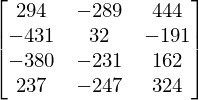

In [83]:
C = np.random.randint(size = (4,3), high = 500, low = -500)
sp.Matrix(C)

In [84]:
R = bic(C, 'qr')

In [85]:
t = sp.latex(sp.Eq(sp.Matrix(C), sp.MatMul(sp.Matrix(R[0]), sp.Matrix(R[1]))))
r = r'{}'.format(t)
display(Math(r))

<IPython.core.display.Math object>

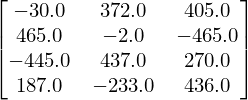

In [30]:
sp.Matrix(np.matmul(R[0],R[1]))

Q = 


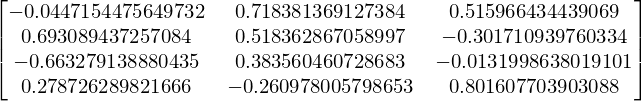

In [31]:
print('Q = ')
sp.Matrix(R[0])

R = 


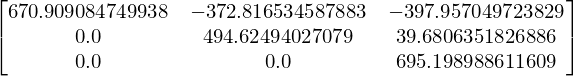

In [32]:
print('R = ')
sp.Matrix(R[1])

# Cholesky Factorisation

In [79]:
A = np.random.randint(low = 1,high = 100, size = (3,3))
C = np.dot(A,A.T)

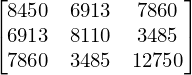

In [80]:
sp.Matrix(C)

In [81]:
R = bic(C, 'cholesky')

In [82]:
t = sp.latex(sp.Eq(sp.Matrix(C), sp.MatMul(sp.Matrix(R.T), sp.Matrix(R))))
r = r'{}'.format(t)
display(Math(r))

<IPython.core.display.Math object>

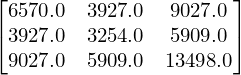

In [37]:
sp.Matrix(np.matmul(R.T,R))

R = 


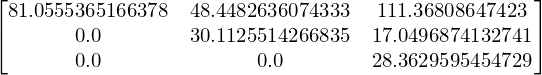

In [38]:
print('R = ')
sp.Matrix(R)

# LDU Facatorisation

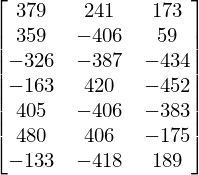

In [74]:
C = np.random.randint(size = (7,3), high = 500, low = -500)
sp.Matrix(C)

In [75]:
R = bic(C,'trapldu')

In [76]:
a0 = R[0]
a2 = R[2]
a1 = R[1]

In [77]:
a0[abs(a0)<1e-10] = 0
a2[abs(a2)<1e-10] = 0
a1[abs(a1)<1e-10] = 0

In [78]:
t = sp.latex(sp.Eq(sp.Matrix(C), sp.MatMul(sp.MatMul(sp.Matrix(a0), sp.Matrix(a1), sp.Matrix(a2)))))
r = r'{}'.format(t)
display(Math(r))

<IPython.core.display.Math object>

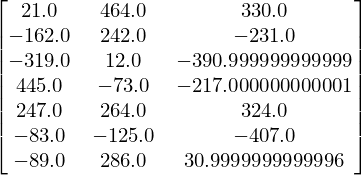

In [46]:
sp.Matrix(np.matmul(np.matmul(R[0],R[1]),R[2]))

L = 


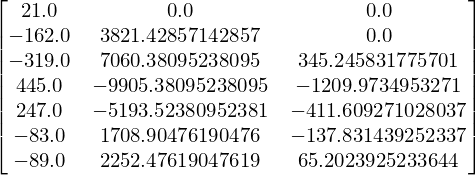

In [47]:
print('L = ')
sp.Matrix(a0)

D =


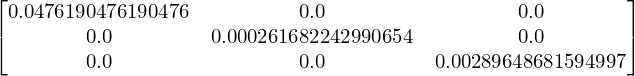

In [48]:
print('D =')
sp.Matrix(a1)

U =


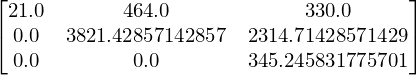

In [49]:
print('U =')
sp.Matrix(a2)

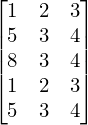

In [50]:
C = np.matrix([[1,2,3],[5,3,4],[8,3,4],[1,2,3],[5,3,4]])
sp.Matrix(C)

# SVD

In [421]:
C = np.random.randint(size = (6,7), high = 500, low = -500)
sp.Matrix(C)

[483   -239  468   395   -49   422   -86 ]
[                                        ]
[ 1    -102  -168  492   102   -291  -343]
[                                        ]
[-113  112   331   218   438   -239  366 ]
[                                        ]
[ 72    36   -445  -255  -102  286   491 ]
[                                        ]
[-167  427   451   -192   75   291   252 ]
[                                        ]
[360   332   -130  -270  -198   78   -344]

In [54]:
from scipy.optimize import minimize

In [375]:
def maxim(C):
    m,n = C.shape
    def objective1(x):
        x1 = np.matrix(x[:n]).T
        y1 = np.matrix(x[n:(n+m)]).T
        return(-np.matmul(np.matmul(y1.T,C),x1))
    def constraint1(x):
        x1 = np.array(x[:n])
        return(np.dot(x1,x1) - 1)
    def constraint2(x):
        y1 = np.array(x[n:(n+m)])
        return(np.dot(y1,y1) - 1)

    x0 = [0 for i in list(range(m+n))]
    con1 = {'type': 'eq', 'fun': constraint1}
    con2 = {'type': 'eq', 'fun': constraint2}

    cons = [con1, con2]
    sol = minimize(objective1,x0,method='SLSQP',constraints=cons)
    return(sol)

In [376]:
def wedd2(x,A):
    m,n = A.shape
    x1 = np.matrix(x[:n]).T
    y1 = np.matrix(x[n:(n+m)]).T
    w = float(np.matmul(y1.T,np.matmul(A,x1)))
    eij = np.matmul(x1,y1.T)
    s = np.matmul(A,np.matmul(eij,A))/w
    return(A - s)

In [377]:
def sv(A):
    r = np.linalg.matrix_rank(A)
    m,n = A.shape
    w = []
    main = []
    u = []
    v = []
    for i in range(r):
        sol = maxim(A)
        main.append(sol.x)
        u.append(np.matrix(main[i][:n]).T)
        v.append(np.matrix(main[i][n:(n+m)]).T)
        w.append(-sol.fun)
        A = wedd2(main[i],A)
    V = np.concatenate(u, axis = 1)
    U = np.concatenate(v, axis = 1)
    W = np.diag(w)
    return(U,W,V)

In [422]:
U,W,V = sv(C)

### Singular Values are:

In [423]:
sp.Matrix(W)

[1062.51280172889        0.0               0.0               0.0               0.0               0.0       ]
[                                                                                                          ]
[      0.0         1007.33392737698        0.0               0.0               0.0               0.0       ]
[                                                                                                          ]
[      0.0               0.0         917.029675400323        0.0               0.0               0.0       ]
[                                                                                                          ]
[      0.0               0.0               0.0         664.778752311346        0.0               0.0       ]
[                                                                                                          ]
[      0.0               0.0               0.0               0.0         365.318361565216        0.0       ]
[                  

In [424]:
sp.Matrix(C)

[483   -239  468   395   -49   422   -86 ]
[                                        ]
[ 1    -102  -168  492   102   -291  -343]
[                                        ]
[-113  112   331   218   438   -239  366 ]
[                                        ]
[ 72    36   -445  -255  -102  286   491 ]
[                                        ]
[-167  427   451   -192   75   291   252 ]
[                                        ]
[360   332   -130  -270  -198   78   -344]

In [425]:
ans = np.matmul(U,np.matmul(W,V.T))

In [426]:
t = sp.latex(sp.Eq(sp.Matrix(ans), sp.MatMul(sp.MatMul(sp.Matrix(U), sp.Matrix(W), sp.Matrix(V.T)))))
r = r'{}'.format(t)
display(Math(r))

<IPython.core.display.Math object>

In [410]:
sp.Matrix(np.linalg.svd(C)[1])

[1243.41793463885]
[                ]
[1164.42783704461]
[                ]
[816.632091999976]
[                ]
[582.451319804234]
[                ]
[218.649681260791]
[                ]
[117.921394974239]

# Second

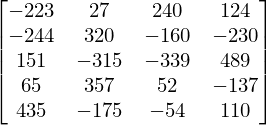

In [86]:
C = np.random.randint(size = (5,4), high = 500, low = -500)
sp.Matrix(C)

In [87]:
def maxim2(C):
    m,n = C.shape
    def objective1(x):
        x1 = np.matrix(x).T
        return(-np.linalg.norm(np.matmul(C,x1)))
    def constraint1(x):
        x1 = np.array(x)
        return(np.dot(x1,x1) - 1)

    x0 = [0 for i in list(range(n))]
    con1 = {'type': 'eq', 'fun': constraint1}

    cons = [con1]
    sol = minimize(objective1,x0,method='SLSQP',constraints=cons)
    return(sol)

In [88]:
def sv1(C):
    m,n = C.shape
    r = np.linalg.matrix_rank(C)
    u = []
    v = []
    w = []
    for i in range(r):
        u.append(np.matrix(maxim2(C).x).T)
        v.append(np.matrix(np.matmul(C,u[i])/np.linalg.norm(np.matmul(C,u[i]))))
        w.append(float(np.matmul(v[i].T,np.matmul(C,u[i]))))
        C = C - (w[i]*(np.matmul(v[i],u[i].T)))
    U = np.concatenate(u, axis = 1)
    V = np.concatenate(v, axis = 1)
    print(w)
    W = np.diag(w)
    return(U,W,V)

In [89]:
U,W,V = sv1(C)

[899.6938799147142, 456.1370088563611, 402.3226005110462, 220.40298743277506]


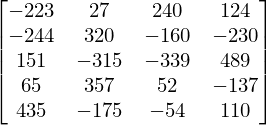

In [90]:
sp.Matrix(C)

In [91]:
ans = sp.Matrix(np.matmul(np.matmul(V,W),U.T))

In [70]:
t = sp.latex(sp.Eq(sp.Matrix(C), sp.MatMul(sp.MatMul(sp.Matrix(V), sp.Matrix(W)), sp.Matrix(U.T))))
r = r'{}'.format(t)
display(Math(r))

<IPython.core.display.Math object>